In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
data = pd.read_csv(r'C:\Users\priya\Desktop\hack\Crop_recommendation.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.shape

(2200, 8)

In [5]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

C:\Users\priya\AppData\Local\Temp\ipykernel_15344\2848616696.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, order=data['label'].value_counts().index, palette='viridis')


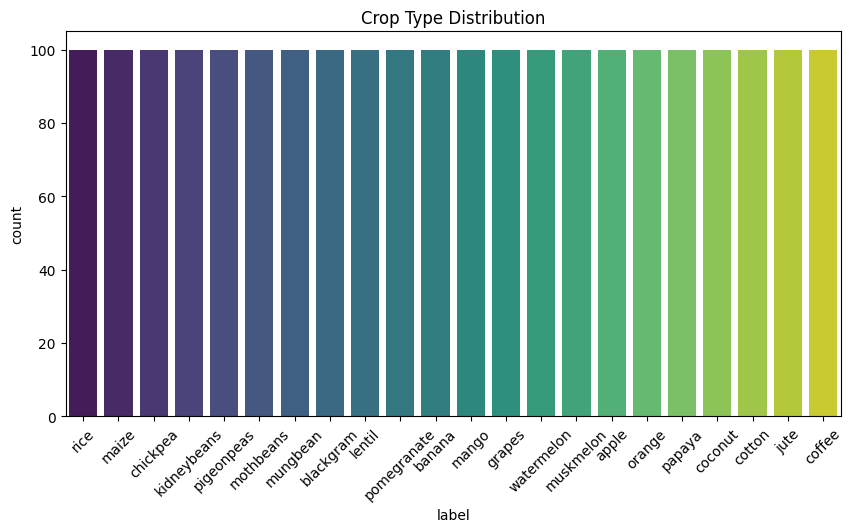

In [6]:
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=data, order=data['label'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title('Crop Type Distribution')
plt.show()

In [7]:
data['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [8]:
imputer = SimpleImputer(strategy='mean')
data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']] = imputer.fit_transform(
    data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
)


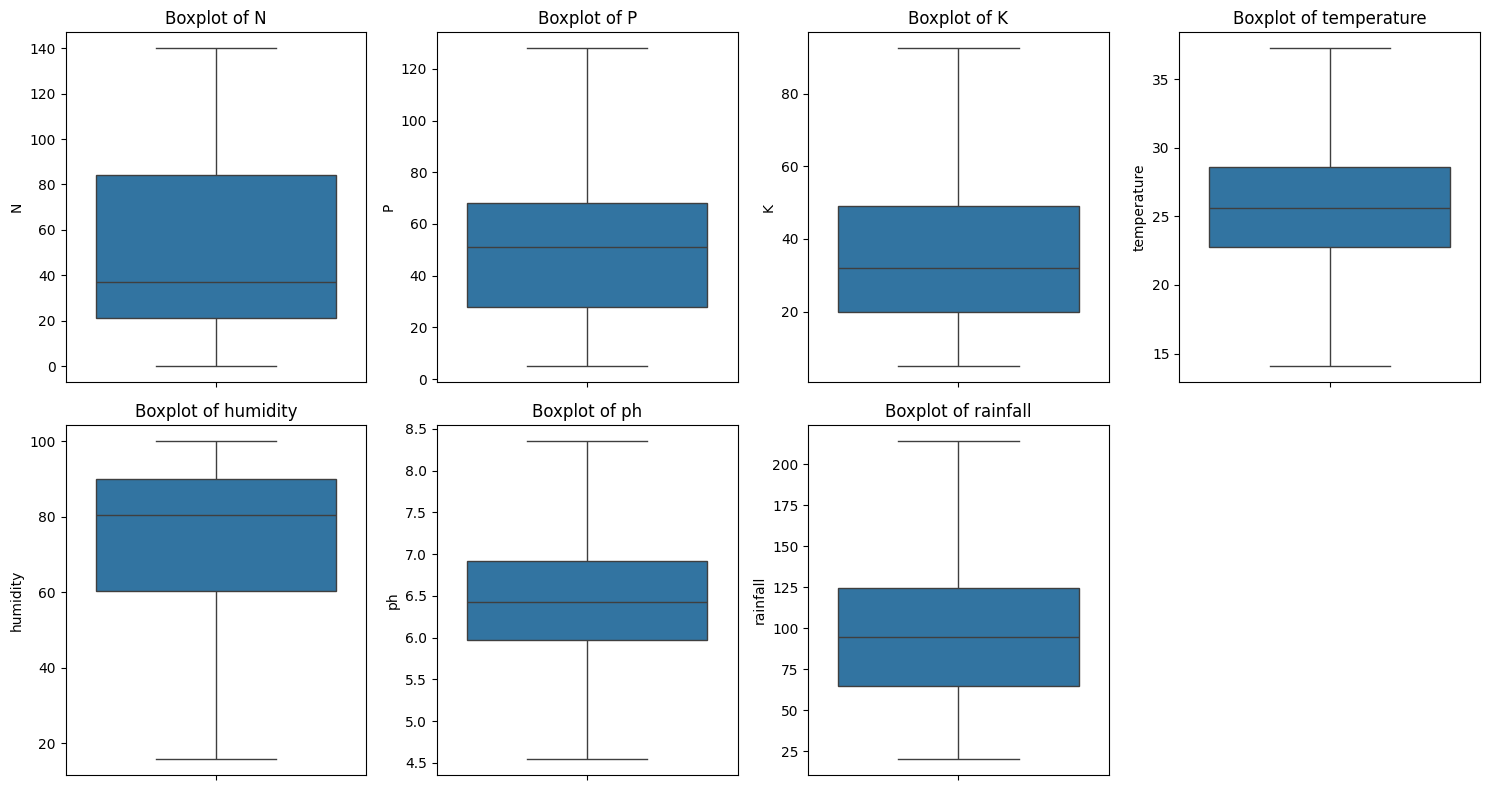

In [12]:
# Boxplots to detect outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [13]:
#Handle Outliers
#IQR method to identify and cap outliers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

for col in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    cap_outliers(data, col)

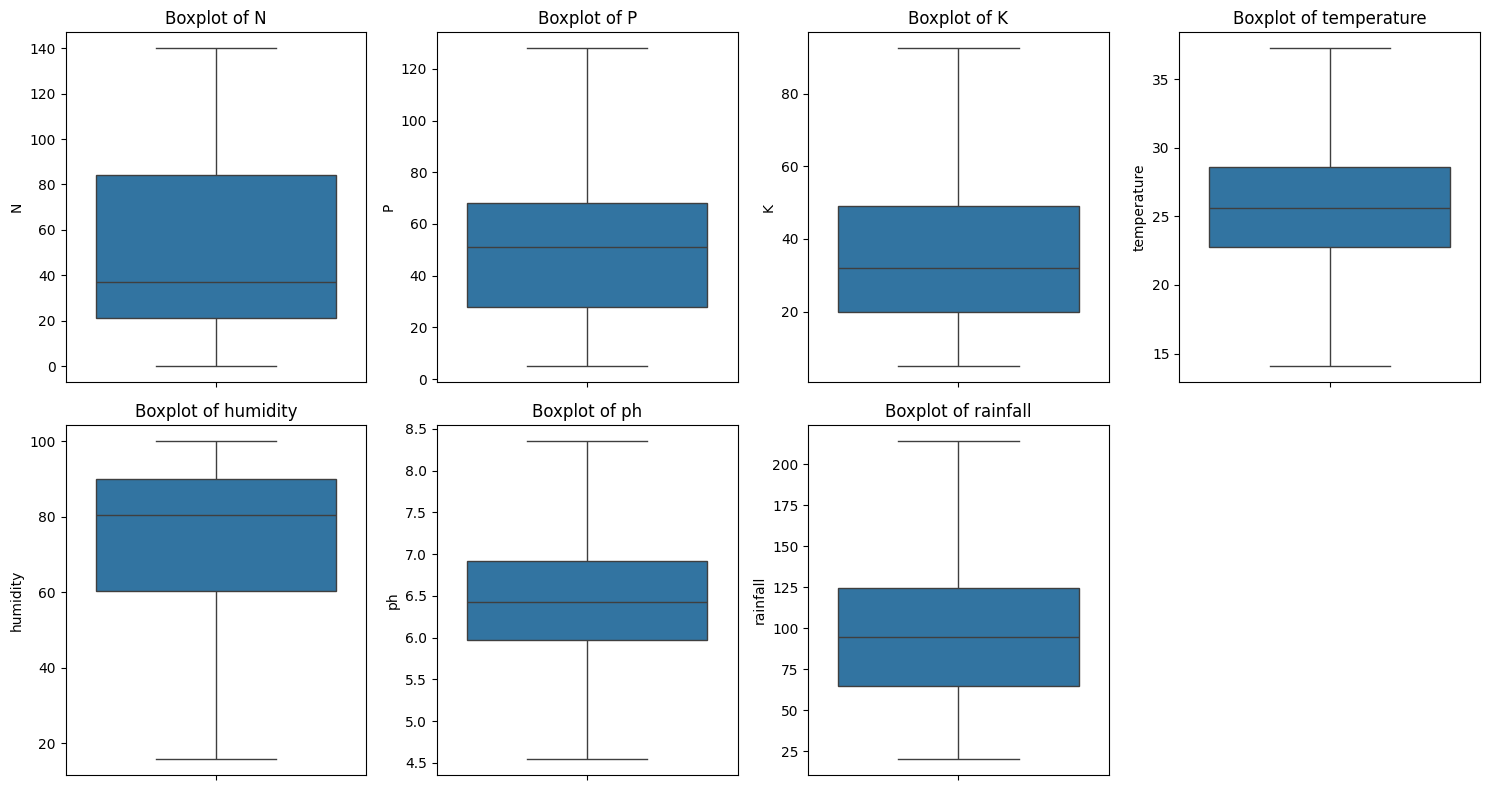

In [14]:
# Boxplots
plt.figure(figsize=(15, 8))
for i, col in enumerate(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

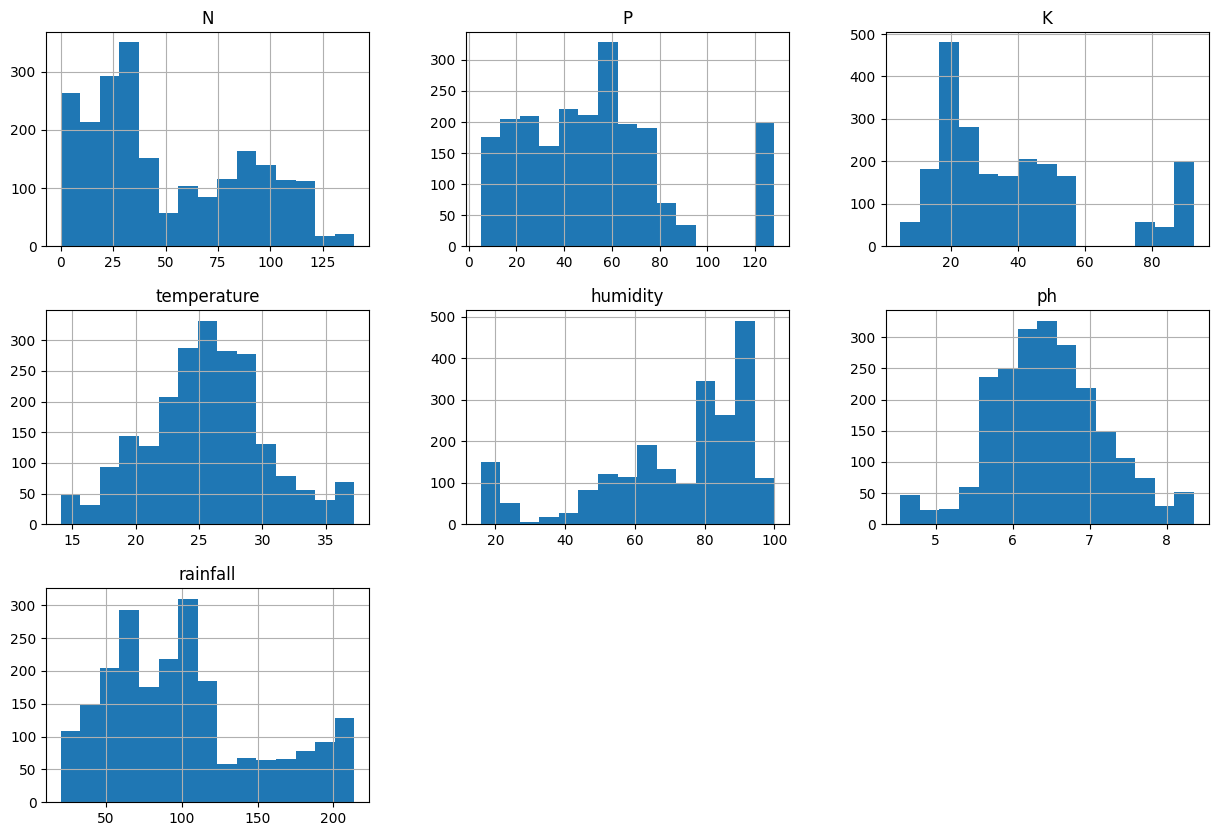

In [15]:
# Histograms for the numerical cols
data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].hist(bins=15, figsize=(15, 10))
plt.show()

C:\Users\priya\AppData\Local\Temp\ipykernel_15344\1871425462.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


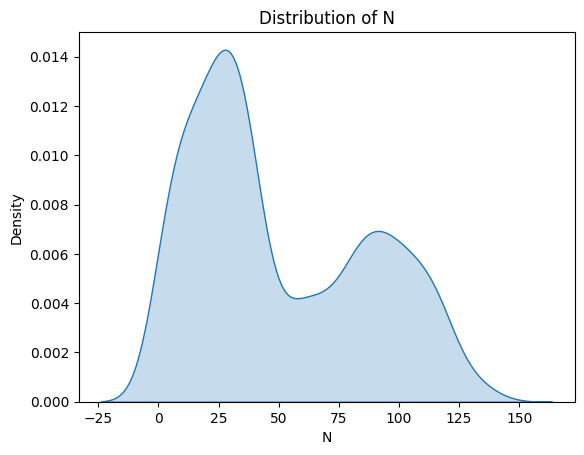

C:\Users\priya\AppData\Local\Temp\ipykernel_15344\1871425462.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


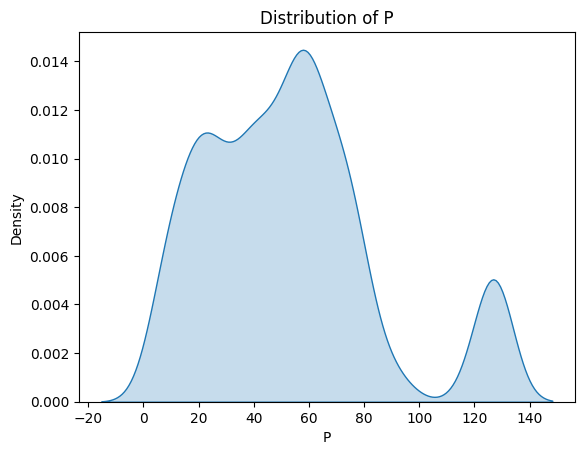

C:\Users\priya\AppData\Local\Temp\ipykernel_15344\1871425462.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


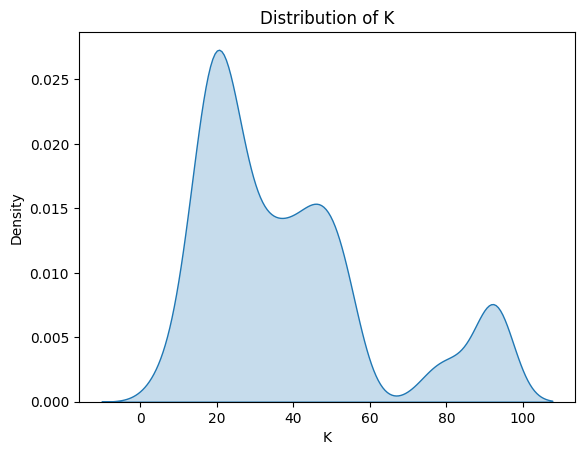

C:\Users\priya\AppData\Local\Temp\ipykernel_15344\1871425462.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


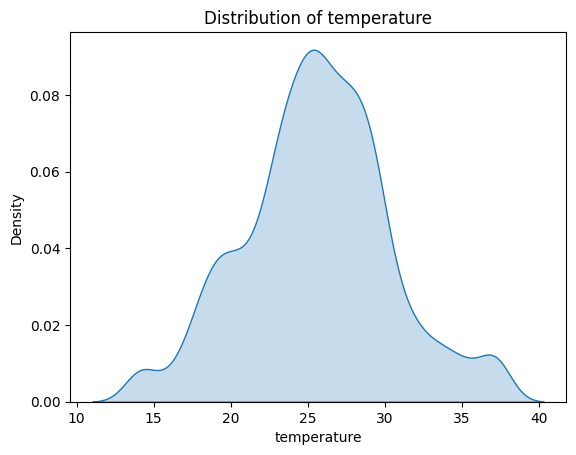

C:\Users\priya\AppData\Local\Temp\ipykernel_15344\1871425462.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


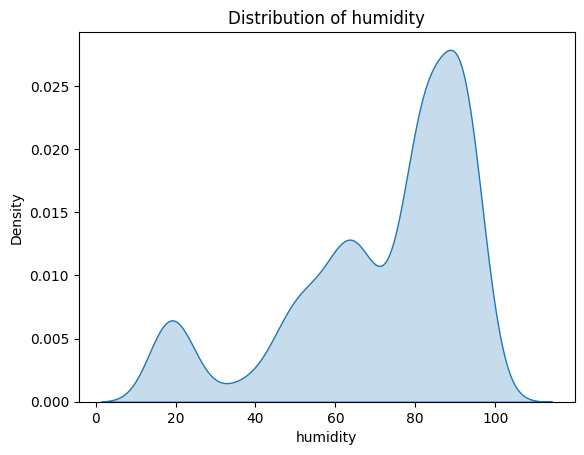

C:\Users\priya\AppData\Local\Temp\ipykernel_15344\1871425462.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


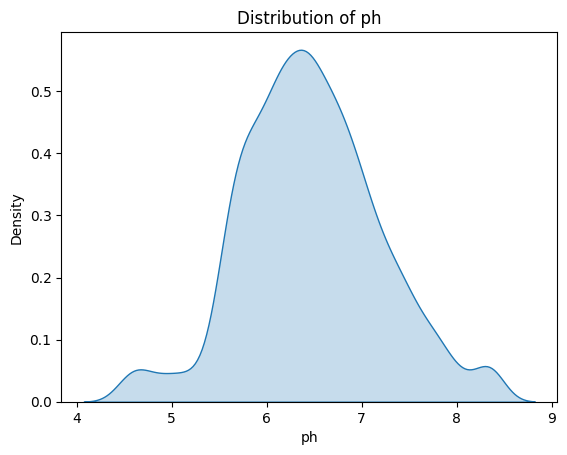

C:\Users\priya\AppData\Local\Temp\ipykernel_15344\1871425462.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


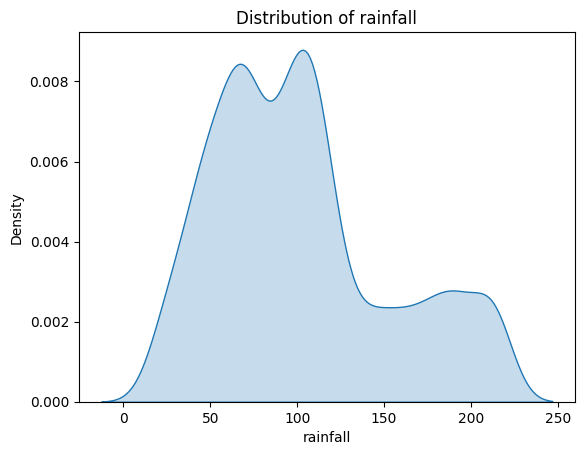

In [16]:
# KDE plots for numerical features
for col in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    sns.kdeplot(data[col], shade=True)
    plt.title(f'Distribution of {col}')
    plt.show()

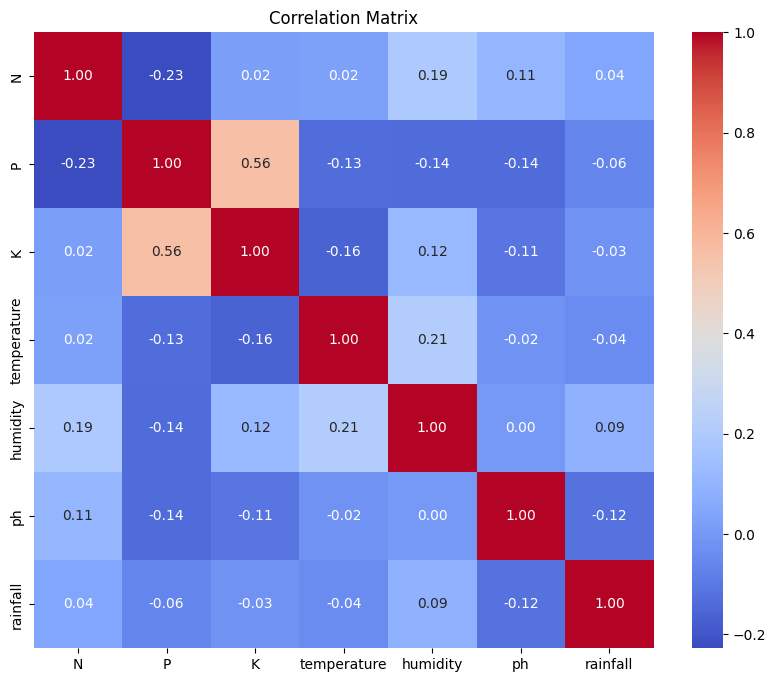

In [17]:
# Select only numeric cols
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

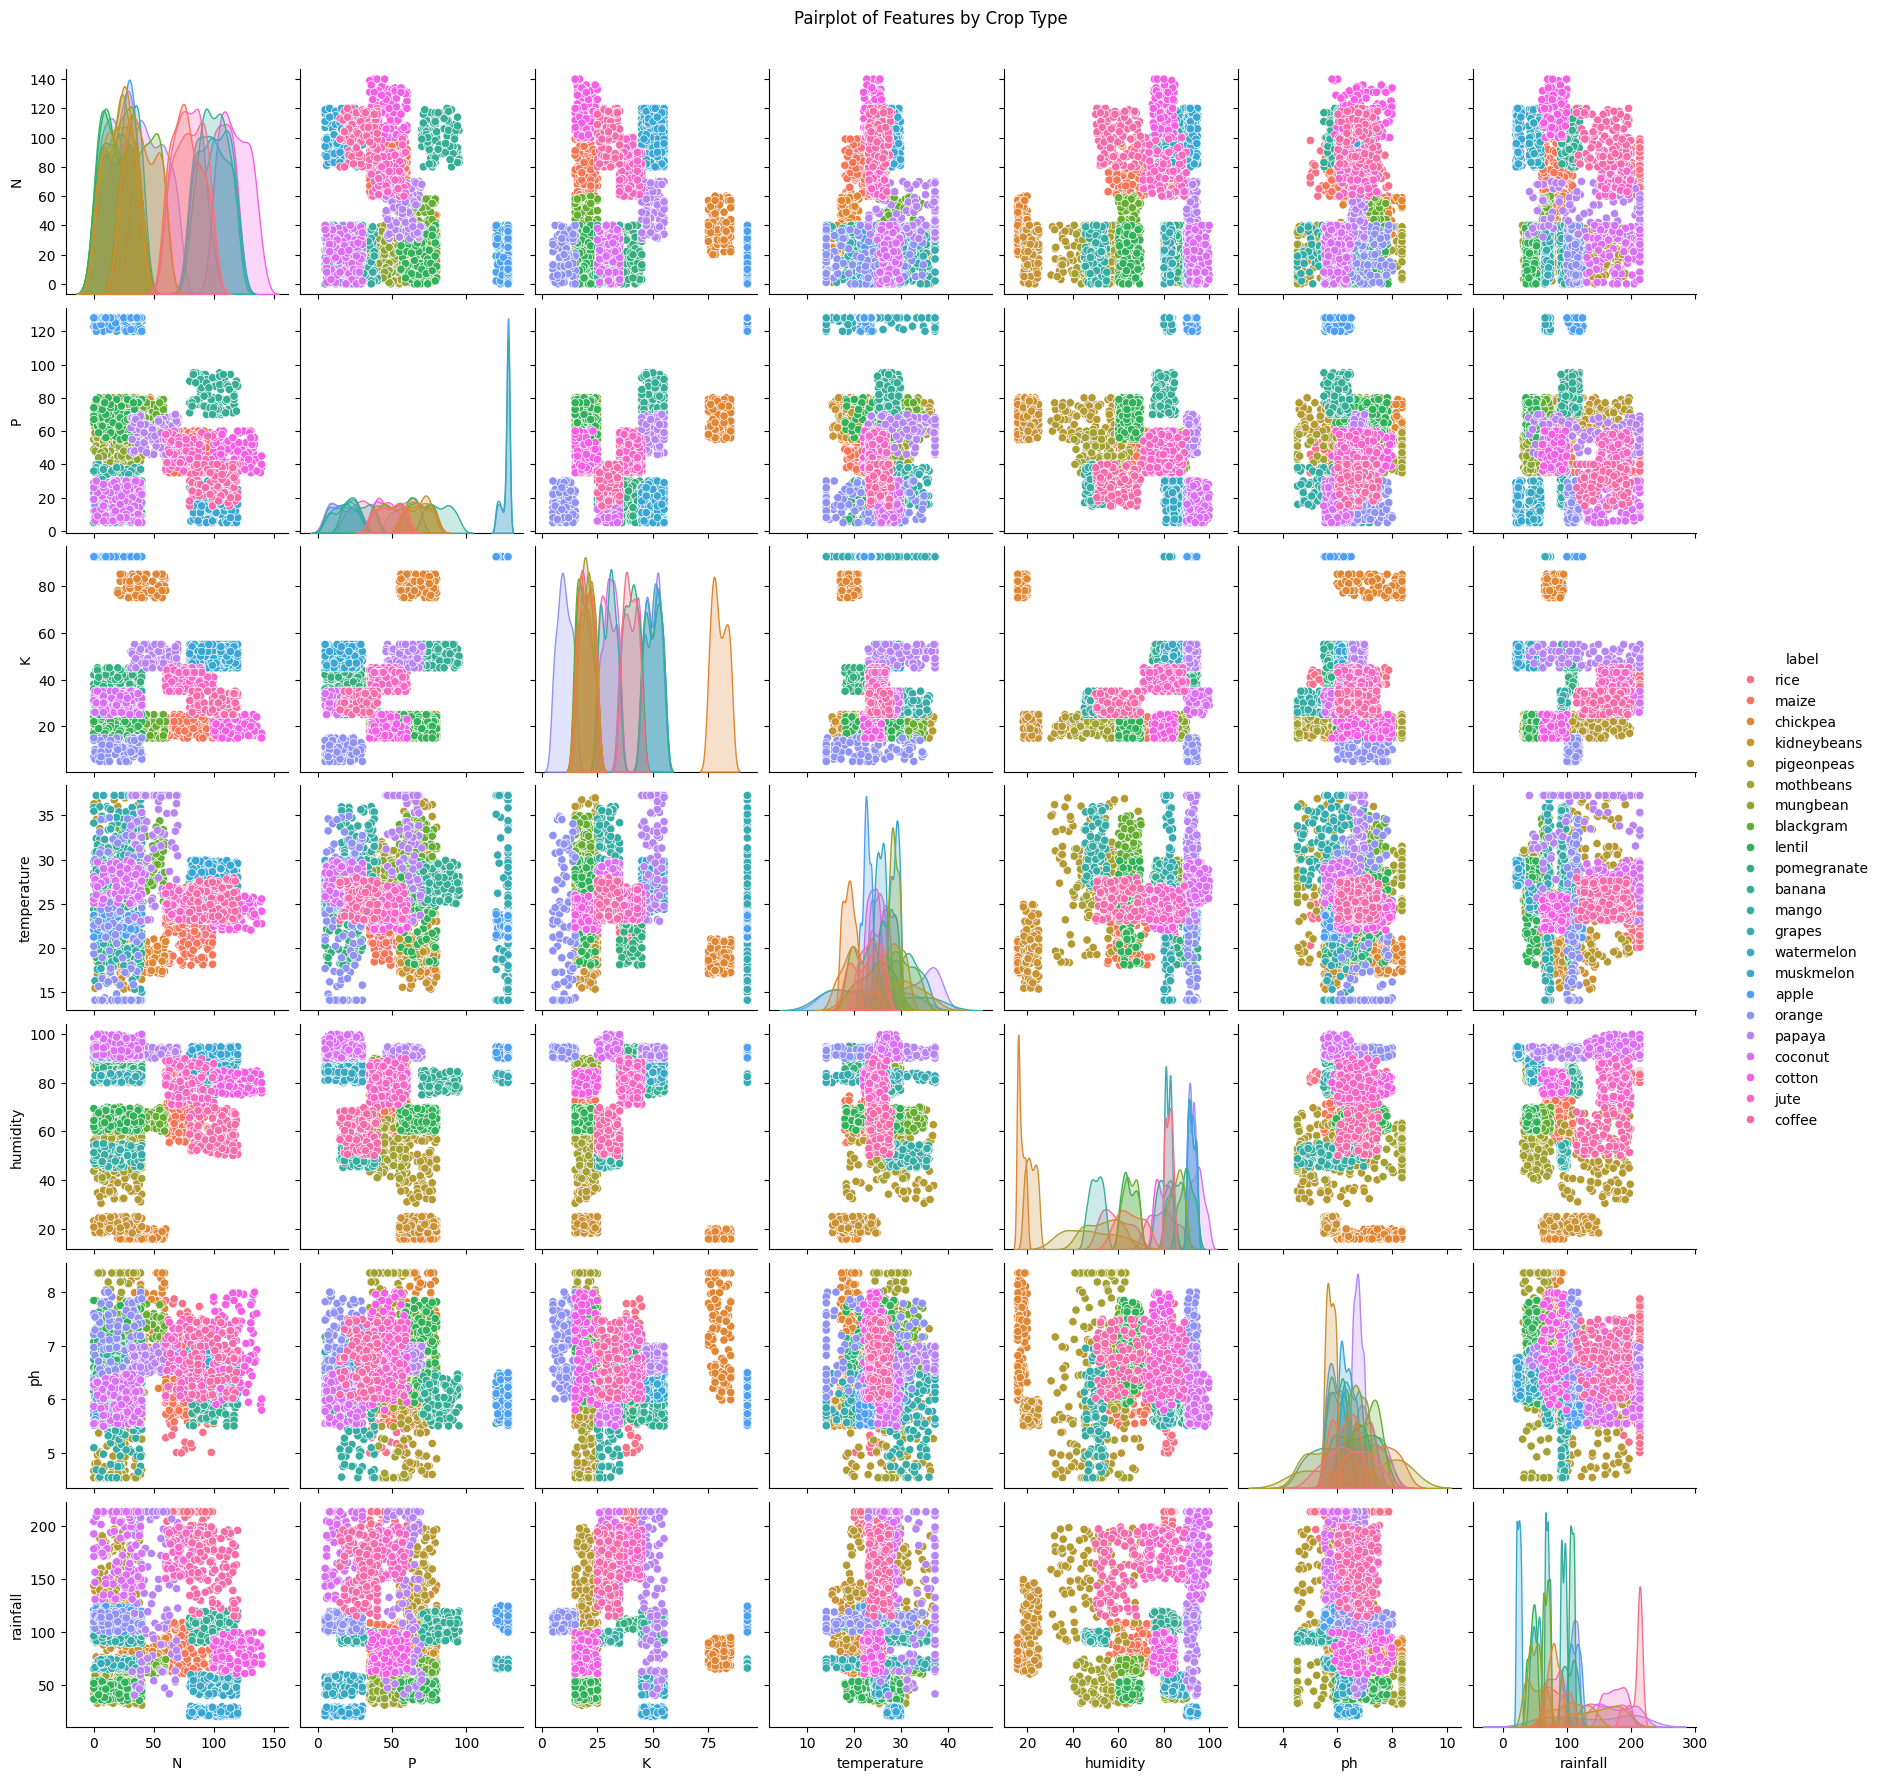

In [18]:
# Pairplot
sns.pairplot(data, vars=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], hue='label', palette='husl')
plt.suptitle("Pairplot of Features by Crop Type", y=1.02)
plt.show()

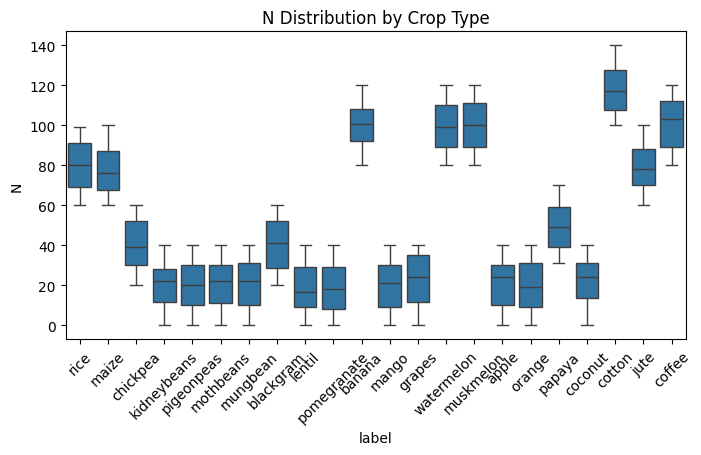

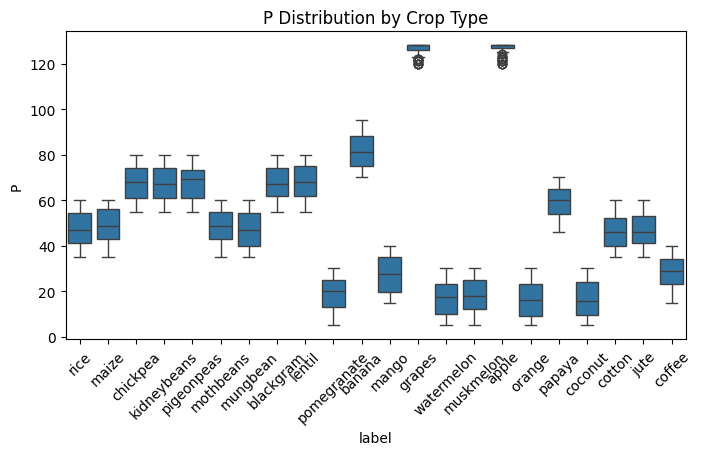

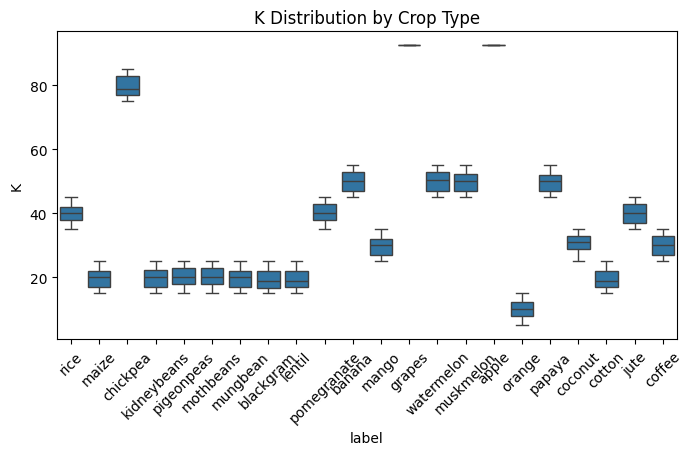

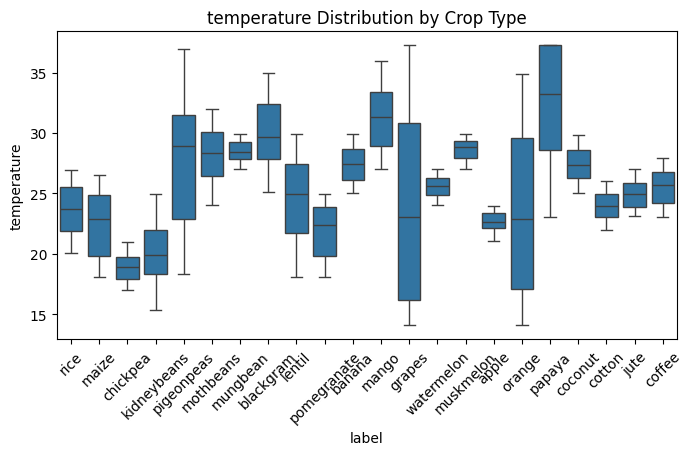

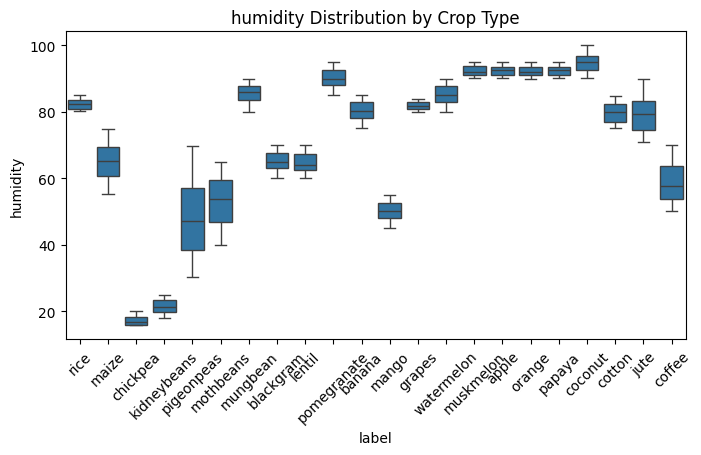

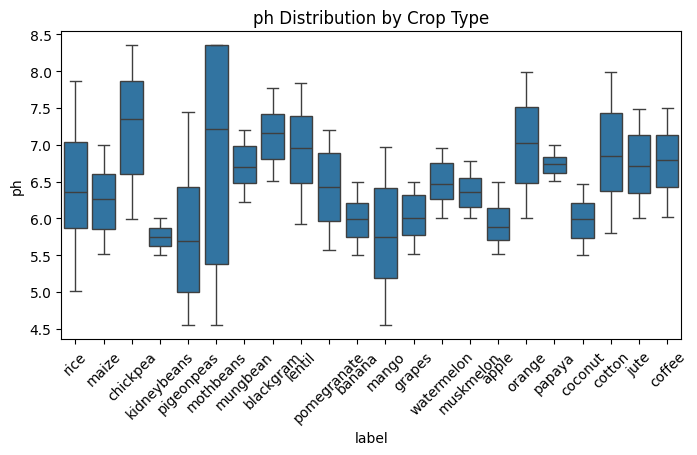

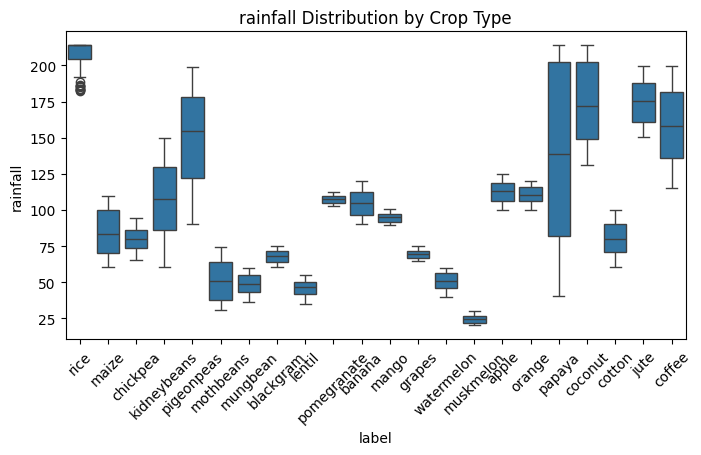

In [19]:
# Boxplots of features grouped by crop
for col in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='label', y=col, data=data)
    plt.xticks(rotation=45)
    plt.title(f'{col} Distribution by Crop Type')
    plt.show()

                  N       P      K  temperature   humidity        ph  \
label                                                                  
apple         20.80  126.66  92.50    22.630942  92.333383  5.929663   
banana       100.23   82.01  50.05    27.376798  80.358123  5.983893   
blackgram     40.02   67.47  19.24    29.973340  65.118426  7.133952   
chickpea      40.09   67.79  79.92    18.872847  17.114928  7.295763   
coconut       21.98   16.93  30.59    27.409892  94.844272  5.976562   
coffee       101.20   28.74  29.94    25.540477  58.869846  6.790308   
cotton       117.77   46.24  19.56    23.988958  79.843474  6.912675   
grapes        23.18  126.46  92.50    24.084137  81.875228  6.025937   
jute          78.40   46.86  39.99    24.958376  79.639864  6.732778   
kidneybeans   20.75   67.54  20.05    20.115085  21.605357  5.749411   
lentil        18.77   68.36  19.41    24.509052  64.804785  6.927932   
maize         77.76   48.44  19.79    22.389204  65.092249  6.24

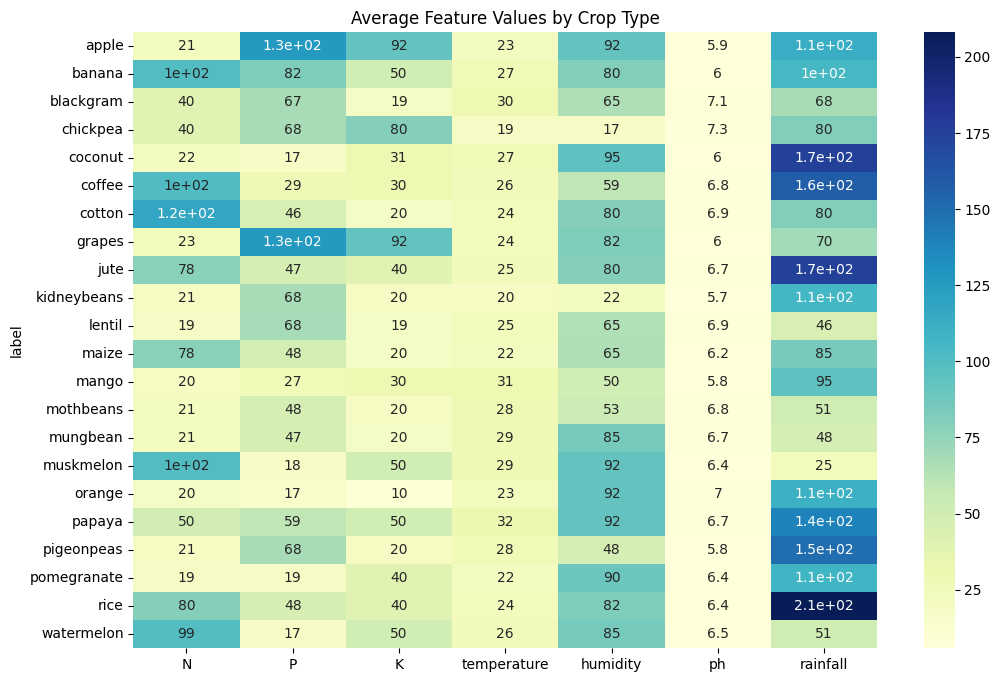

In [20]:
crop_mean = data.groupby('label').mean()
print(crop_mean)

plt.figure(figsize=(12, 8))
sns.heatmap(crop_mean, annot=True, cmap='YlGnBu')
plt.title('Average Feature Values by Crop Type')
plt.show()

In [21]:
label_encoder = LabelEncoder()
data['crop'] = label_encoder.fit_transform(data['label'])

In [22]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']])
X = pd.DataFrame(scaled_features, columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
y = data['label']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


In [26]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
    

In [27]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 23  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0